# ML (Machine Learning)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings( 'ignore' )

In [4]:
df = pd.read_csv('esg_after_preprocessing.csv', encoding='utf-8-sig', index_col=0)
df

,회사명,KCGS_종합등급,KCGS_환경,KCGS_사회,KCGS_지배구조,연도,company_id,KCGS_종합등급_encoded,KCGS_환경_encoded,KCGS_사회_encoded,KCGS_지배구조_encoded
0,AJ네트웍스,B,D,B,B,2020,0,3.0,1.0,3.0,3.0
1,AJ네트웍스,B,D,B,B,2021,0,3.0,1.0,3.0,3.0
2,AJ네트웍스,B+,C,B+,B+,2022,0,3.5,2.0,3.5,3.5
3,AJ네트웍스,B+,C,B+,B+,2023,0,3.5,2.0,3.5,3.5
4,AK홀딩스,B+,C,B+,B+,2020,1,3.5,2.0,3.5,3.5
...,...,...,...,...,...,...,...,...,...,...,...
3171,흥국화재,B+,C,B+,B+,2023,792,3.5,2.0,3.5,3.5
3172,흥아해운,D,D,C,D,2020,793,1.0,1.0,2.0,1.0
3173,흥아해운,D,D,C,D,2021,793,1.0,1.0,2.0,1.0
3174,흥아해운,C,C,B,C,2022,793,2.0,2.0,3.0,2.0


In [5]:
len(df['회사명'].unique())

780

총 780개의 회사의 대략 4년치 esg 데이터임을 확인할 수 있다.

### 중복값 지우기

다음과 같이 연도별 중복값이 있는 경우가 있기에 지워준다.

In [6]:
df[df['회사명'] == '미래에셋증권']

,회사명,KCGS_종합등급,KCGS_환경,KCGS_사회,KCGS_지배구조,연도,company_id,KCGS_종합등급_encoded,KCGS_환경_encoded,KCGS_사회_encoded,KCGS_지배구조_encoded
1244,미래에셋증권,A,B+,A+,B+,2020,311,4.0,3.5,4.5,3.5
1245,미래에셋증권,B+,A,A+,B,2021,311,3.5,4.0,4.5,3.0
1246,미래에셋증권,A,A,A+,B+,2022,311,4.0,4.0,4.5,3.5
1247,미래에셋증권,A,A,A+,B+,2023,311,4.0,4.0,4.5,3.5


In [7]:
df[df['회사명'] == '미원홀딩스']

,회사명,KCGS_종합등급,KCGS_환경,KCGS_사회,KCGS_지배구조,연도,company_id,KCGS_종합등급_encoded,KCGS_환경_encoded,KCGS_사회_encoded,KCGS_지배구조_encoded
1256,미원홀딩스,C,C,C,C,2020,314,2.0,2.0,2.0,2.0
1257,미원홀딩스,C,C,C,B,2021,314,2.0,2.0,2.0,3.0
1258,미원홀딩스,C,C,C,B,2022,314,2.0,2.0,2.0,3.0
1259,미원홀딩스,C,C,C,B,2023,314,2.0,2.0,2.0,3.0


회사명, 종합등급, 연도가 동일한 경우 지워준다.

In [9]:
df = df.drop_duplicates(['회사명', 'KCGS_종합등급', '연도'], keep = 'first')
df

,회사명,KCGS_종합등급,KCGS_환경,KCGS_사회,KCGS_지배구조,연도,company_id,KCGS_종합등급_encoded,KCGS_환경_encoded,KCGS_사회_encoded,KCGS_지배구조_encoded
0,AJ네트웍스,B,D,B,B,2020,0,3.0,1.0,3.0,3.0
1,AJ네트웍스,B,D,B,B,2021,0,3.0,1.0,3.0,3.0
2,AJ네트웍스,B+,C,B+,B+,2022,0,3.5,2.0,3.5,3.5
3,AJ네트웍스,B+,C,B+,B+,2023,0,3.5,2.0,3.5,3.5
4,AK홀딩스,B+,C,B+,B+,2020,1,3.5,2.0,3.5,3.5
...,...,...,...,...,...,...,...,...,...,...,...
3171,흥국화재,B+,C,B+,B+,2023,792,3.5,2.0,3.5,3.5
3172,흥아해운,D,D,C,D,2020,793,1.0,1.0,2.0,1.0
3173,흥아해운,D,D,C,D,2021,793,1.0,1.0,2.0,1.0
3174,흥아해운,C,C,B,C,2022,793,2.0,2.0,3.0,2.0


In [10]:
# unique 한 값만 가져오기 - 중복되지 않은 회사명 가져오기
companies = df['회사명'].unique()

각 회사에서 가장 오래된 esg 점수와 가장 최신의 esg 점수를 조회할 수 있다.

In [11]:
for company in companies:
    company_df = df[df['회사명'] == company]
    print(company_df.iloc[0,:]) # 가장 오래된
    print('-'*30)
    print(company_df.iloc[-1,:]) # 가장 최신
    break

회사명                  AJ네트웍스
KCGS_종합등급                 B
KCGS_환경                   D
KCGS_사회                   B
KCGS_지배구조                 B
연도                     2020
company_id                0
KCGS_종합등급_encoded       3.0
KCGS_환경_encoded         1.0
KCGS_사회_encoded         3.0
KCGS_지배구조_encoded       3.0
Name: 0, dtype: object
------------------------------
회사명                  AJ네트웍스
KCGS_종합등급                B+
KCGS_환경                   C
KCGS_사회                  B+
KCGS_지배구조                B+
연도                     2023
company_id                0
KCGS_종합등급_encoded       3.5
KCGS_환경_encoded         2.0
KCGS_사회_encoded         3.5
KCGS_지배구조_encoded       3.5
Name: 3, dtype: object


다음과 같이 esg 점수가 좋아졌는지 파악할 수 있다. (최신 종합점수 - 가장 오래된 종합 점수)

In [12]:
result_dict = {}

for company in companies:
    company_df = df[df['회사명'] == company]
    old = company_df.iloc[0,:]['KCGS_종합등급_encoded']
    new = company_df.iloc[-1,:]['KCGS_종합등급_encoded']
    result_dict[company] = new - old      # 최신 종합점수 - 가장 오래된 종합 점수

In [13]:
result_dict

{'AJ네트웍스': 0.5,
 'AK홀딩스': 0.0,
 'BGF': 0.0,
 'BGF리테일': 0.0,
 'BNK금융지주': -0.5,
 'BYC': -2.0,
 'CJ': -0.5,
 'CJ CGV': -0.5,
 'CJ대한통운': -0.5,
 'CJ씨푸드': 0.0,
 'CJ제일제당': 0.0,
 'CS홀딩스': 0.0,
 'DB': 0.0,
 'DB금융투자': 0.0,
 'DB손해보험': 0.0,
 'DB하이텍': -0.5,
 'DGB금융지주': -0.5,
 'DL': 0.5,
 'DL건설': 1.0,
 'DL이앤씨': 0.0,
 'DN오토모티브': -1.0,
 'DRB동일': -1.0,
 'DSR': -1.0,
 'DSR제강': 0.0,
 'E1': 0.5,
 'F&F 홀딩스': 2.0,
 'GKL': 0.5,
 'GS': 0.5,
 'GS건설': 0.0,
 'GS글로벌': 0.5,
 'GS리테일': 1.0,
 'HDC': -1.5,
 'HDC랩스': -1.0,
 'HDC현대EP': -1.0,
 'HDC현대산업개발': 0.0,
 'HD한국조선해양': 0.0,
 'HD현대': 0.0,
 'HD현대건설기계': 0.0,
 'HD현대에너지솔루션': 0.0,
 'HD현대인프라코어': -0.5,
 'HD현대일렉트릭': -0.5,
 'HD현대중공업': 0.0,
 'HJ중공업': 0.0,
 'HL D&I': 0.0,
 'HLB글로벌': -1.0,
 'HL만도': 0.0,
 'HL홀딩스': 0.0,
 'HMM': 0.0,
 'HSD엔진': -0.5,
 'HS애드': 0.0,
 'JB금융지주': -0.5,
 'JW생명과학': -1.5,
 'JW중외제약': -1.0,
 'JW홀딩스': 0.0,
 'KB금융': 0.0,
 'KC그린홀딩스': -2.0,
 'KC코트렐': -2.0,
 'KEC': -1.0,
 'KG모빌리티': 0.0,
 'KG스틸': -1.0,
 'KG케미칼': 0.0,
 'KH 필룩스': -1.0,
 'KIB플러그에너지': -1.0,
 'KISCO홀딩스'

In [14]:
pd.Series(result_dict.values()).value_counts() # 각각 분포가 어떤지 조회

 0.0    258
-1.0    244
-2.0     84
 0.5     70
-0.5     51
-1.5     29
 1.0     28
 1.5      9
 2.0      3
-2.5      3
 2.5      1
dtype: int64

In [16]:
df['increase_decrease'] = df['회사명'].map(result_dict)  # df에 새로운 열 추가
df

,회사명,KCGS_종합등급,KCGS_환경,KCGS_사회,KCGS_지배구조,연도,company_id,KCGS_종합등급_encoded,KCGS_환경_encoded,KCGS_사회_encoded,KCGS_지배구조_encoded,increase_decrease
0,AJ네트웍스,B,D,B,B,2020,0,3.0,1.0,3.0,3.0,0.5
1,AJ네트웍스,B,D,B,B,2021,0,3.0,1.0,3.0,3.0,0.5
2,AJ네트웍스,B+,C,B+,B+,2022,0,3.5,2.0,3.5,3.5,0.5
3,AJ네트웍스,B+,C,B+,B+,2023,0,3.5,2.0,3.5,3.5,0.5
4,AK홀딩스,B+,C,B+,B+,2020,1,3.5,2.0,3.5,3.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3171,흥국화재,B+,C,B+,B+,2023,792,3.5,2.0,3.5,3.5,0.5
3172,흥아해운,D,D,C,D,2020,793,1.0,1.0,2.0,1.0,1.0
3173,흥아해운,D,D,C,D,2021,793,1.0,1.0,2.0,1.0,1.0
3174,흥아해운,C,C,B,C,2022,793,2.0,2.0,3.0,2.0,1.0


In [17]:
# 중간 저장
df.to_csv('esg_after_preprocessing2.csv', encoding='utf-8-sig')

# ML

분석을 위해 2023년 데이터만 가지고 온다.

In [19]:
df_2023 = df[df['연도'] == 2023].reset_index(drop=True)
df_2023

,회사명,KCGS_종합등급,KCGS_환경,KCGS_사회,KCGS_지배구조,연도,company_id,KCGS_종합등급_encoded,KCGS_환경_encoded,KCGS_사회_encoded,KCGS_지배구조_encoded,increase_decrease
0,AJ네트웍스,B+,C,B+,B+,2023,0,3.5,2.0,3.5,3.5,0.5
1,AK홀딩스,B+,B,A,B,2023,1,3.5,3.0,4.0,3.0,0.0
2,BGF,B+,A,A+,B,2023,2,3.5,4.0,4.5,3.0,0.0
3,BGF리테일,A,A,A+,A,2023,3,4.0,4.0,4.5,4.0,0.0
4,BNK금융지주,A,A,A,A,2023,4,4.0,4.0,4.0,4.0,-0.5
...,...,...,...,...,...,...,...,...,...,...,...,...
755,휴니드테크놀러지스,D,D,C,C,2023,789,1.0,1.0,2.0,2.0,-1.0
756,휴비스,B+,B+,A,B+,2023,790,3.5,3.5,4.0,3.5,0.0
757,휴스틸,D,D,D,C,2023,791,1.0,1.0,1.0,2.0,-1.0
758,흥국화재,B+,C,B+,B+,2023,792,3.5,2.0,3.5,3.5,0.5


In [20]:
# 이 중 필요한 열만 갖고오기
df_2023 = df_2023[['회사명', 'KCGS_종합등급_encoded', 'KCGS_환경_encoded', 'KCGS_사회_encoded', 'KCGS_지배구조_encoded', 'increase_decrease']]

### Clustering

In [21]:
df_2023

,회사명,KCGS_종합등급_encoded,KCGS_환경_encoded,KCGS_사회_encoded,KCGS_지배구조_encoded,increase_decrease
0,AJ네트웍스,3.5,2.0,3.5,3.5,0.5
1,AK홀딩스,3.5,3.0,4.0,3.0,0.0
2,BGF,3.5,4.0,4.5,3.0,0.0
3,BGF리테일,4.0,4.0,4.5,4.0,0.0
4,BNK금융지주,4.0,4.0,4.0,4.0,-0.5
...,...,...,...,...,...,...
755,휴니드테크놀러지스,1.0,1.0,2.0,2.0,-1.0
756,휴비스,3.5,3.5,4.0,3.5,0.0
757,휴스틸,1.0,1.0,1.0,2.0,-1.0
758,흥국화재,3.5,2.0,3.5,3.5,0.5


In [22]:
data = df_2023.iloc[:,1:]

### 총 몇개의 클러스터가 적합한지 파악하기 위해 계층적 군집화를 실행한다

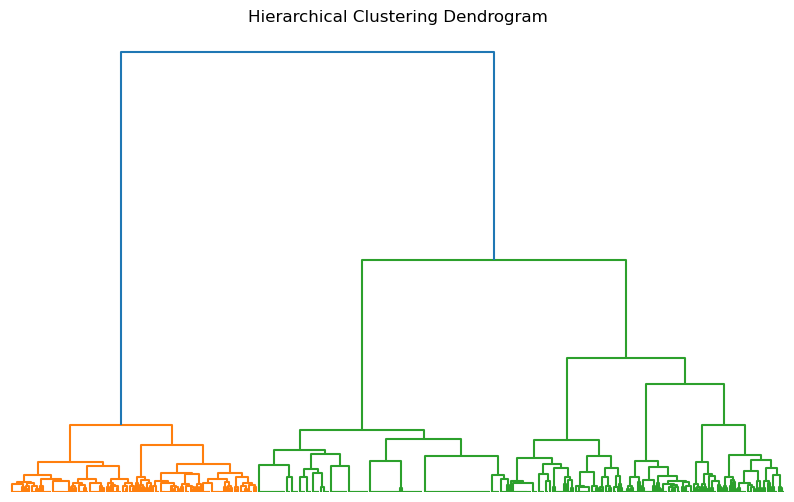

In [33]:
from scipy.cluster.hierarchy import linkage, dendrogram

# 계층적 군집화 수행
linkage_matrix = linkage(data, method='ward')

# 덴드로그램 그리기
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, labels=df_2023['회사명'].values, orientation='top')
plt.title('Hierarchical Clustering Dendrogram')
plt.axis('off')
plt.show()

위와 같이 크게 4개의 클러스터로 나뉨을 확인할 수 있다.

다음으로 KMeans 클러스터링 알고리즘을 사용하여 `클러스터링을 수행`한다.<br>KMeans 클래스의 객체를 생성하고, 클러스터의 개수를 4개로 설정하여 데이터에 모델을 적합시키고 데이터 포인트에 대해 해당 포인트가 속한 클러스터 인덱스를 반환한다. 클러스터링 결과를 'clusters' 변수에 저장하여 각 데이터 포인트의 소속 클러스터를 알 수 있다.

In [34]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4)
clusters = kmeans.fit_predict(data)

In [35]:
df_2023['클러스터'] = clusters

### 총 4가지의 군집

In [36]:
df_2023[df_2023['클러스터'] == 0]

,회사명,KCGS_종합등급_encoded,KCGS_환경_encoded,KCGS_사회_encoded,KCGS_지배구조_encoded,increase_decrease,클러스터
5,BYC,1.0,1.0,1.0,1.0,-2.0,0
22,DSR,1.0,1.0,2.0,1.0,-1.0,0
32,HDC랩스,1.0,1.0,1.0,1.0,-1.0,0
44,HLB글로벌,1.0,1.0,2.0,1.0,-1.0,0
55,KC그린홀딩스,1.0,1.0,1.0,2.0,-2.0,0
...,...,...,...,...,...,...,...
742,화인베스틸,1.0,2.0,1.0,1.0,-2.0,0
743,화천기계,1.0,1.0,1.0,1.0,-1.0,0
744,화천기공,1.0,1.0,1.0,2.0,-1.0,0
755,휴니드테크놀러지스,1.0,1.0,2.0,2.0,-1.0,0


In [37]:
df_2023[df_2023['클러스터'] == 1]

,회사명,KCGS_종합등급_encoded,KCGS_환경_encoded,KCGS_사회_encoded,KCGS_지배구조_encoded,increase_decrease,클러스터
0,AJ네트웍스,3.5,2.0,3.5,3.5,0.5,1
1,AK홀딩스,3.5,3.0,4.0,3.0,0.0,1
2,BGF,3.5,4.0,4.5,3.0,0.0,1
3,BGF리테일,4.0,4.0,4.5,4.0,0.0,1
4,BNK금융지주,4.0,4.0,4.0,4.0,-0.5,1
...,...,...,...,...,...,...,...
752,효성화학,4.0,4.0,4.5,3.5,-0.5,1
753,후성,3.0,3.0,3.5,3.0,1.0,1
754,휠라홀딩스,3.5,3.0,4.0,3.5,0.0,1
756,휴비스,3.5,3.5,4.0,3.5,0.0,1


In [38]:
df_2023[df_2023['클러스터'] == 2]

,회사명,KCGS_종합등급_encoded,KCGS_환경_encoded,KCGS_사회_encoded,KCGS_지배구조_encoded,increase_decrease,클러스터
11,CS홀딩스,2.0,1.0,1.0,3.0,0.0,2
20,DN오토모티브,2.0,2.0,1.0,3.0,-1.0,2
23,DSR제강,2.0,1.0,2.0,3.0,0.0,2
34,HDC현대산업개발,2.0,1.0,2.0,3.0,0.0,2
57,KEC,2.0,2.0,1.0,2.0,-1.0,2
...,...,...,...,...,...,...,...
697,한진중공업홀딩스,2.0,1.0,1.0,3.5,-1.0,2
700,한창제지,2.0,2.0,2.0,3.0,-1.0,2
739,화승인더스트리,2.0,2.0,2.0,3.5,-1.0,2
740,화승코퍼레이션,2.0,2.0,2.0,3.0,-1.5,2


In [39]:
df_2023[df_2023['클러스터'] == 3]

,회사명,KCGS_종합등급_encoded,KCGS_환경_encoded,KCGS_사회_encoded,KCGS_지배구조_encoded,increase_decrease,클러스터
9,CJ씨푸드,3.0,2.0,3.0,3.0,0.0,3
12,DB,3.0,1.0,3.0,3.5,0.0,3
13,DB금융투자,3.0,2.0,3.0,3.0,0.0,3
15,DB하이텍,3.0,3.0,3.5,3.0,-0.5,3
21,DRB동일,2.0,1.0,3.5,3.0,-1.0,3
...,...,...,...,...,...,...,...
729,현대코퍼레이션홀딩스,3.0,2.0,3.0,3.5,1.0,3
737,화성산업,3.0,2.0,3.5,3.0,0.0,3
741,화신,2.0,2.0,4.0,2.0,0.0,3
745,환인제약,3.0,1.0,3.5,3.5,0.0,3


In [40]:
cluster_centers = kmeans.cluster_centers_

In [41]:
cluster_centers

array([[ 1.02057613,  1.13168724,  1.32921811,  1.28806584, -1.3127572 ],
       [ 3.71899225,  3.50193798,  4.02325581,  3.5755814 ,  0.21705426],
       [ 1.96062992,  1.32283465,  1.52755906,  2.77952756, -0.43307087],
       [ 2.43560606,  2.0530303 ,  3.31818182,  2.36363636, -0.51893939]])

In [42]:
cluster_centers_rounded = np.round(cluster_centers, decimals=2)   # 소수점 둘째 자리까지 반올림
cluster_centers_rounded

array([[ 1.02,  1.13,  1.33,  1.29, -1.31],
       [ 3.72,  3.5 ,  4.02,  3.58,  0.22],
       [ 1.96,  1.32,  1.53,  2.78, -0.43],
       [ 2.44,  2.05,  3.32,  2.36, -0.52]])

In [43]:
column_names = 'KCGS_종합등급', 'KCGS_환경', 'KCGS_사회', 'KCGS_지배구조', '증감'
cluster_centers_df = pd.DataFrame(cluster_centers_rounded, columns=column_names)
cluster_centers_df

,KCGS_종합등급,KCGS_환경,KCGS_사회,KCGS_지배구조,증감
0,1.02,1.13,1.33,1.29,-1.31
1,3.72,3.50,4.02,3.58,0.22
2,1.96,1.32,1.53,2.78,-0.43
3,2.44,2.05,3.32,2.36,-0.52


In [44]:
# 한글 오류 안 뜨게 하는 코드
import os
import matplotlib.pyplot as plt

if os.name == 'posix':
    plt.rc("font", family="AppleGothic")

else:
    plt.rc("font", family="Malgun Gothic")
    
# - (마이너스) 안 깨지는 코드
plt.rcParams['axes.unicode_minus'] = False

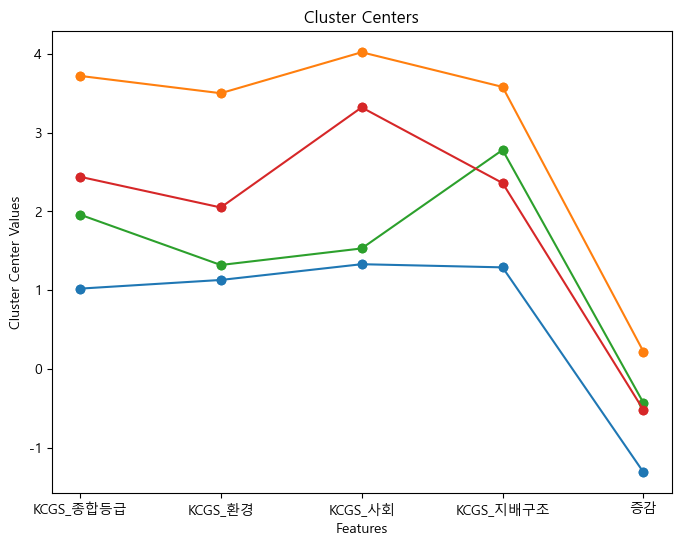

In [45]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
for i in range(len(cluster_centers_df)):
    plt.scatter(range(len(cluster_centers_df.columns)), cluster_centers_df.iloc[i])
    plt.plot(range(len(cluster_centers_df.columns)), cluster_centers_df.iloc[i], '-o')   # 점으로 시각화
plt.xticks(range(len(cluster_centers_df.columns)), cluster_centers_df.columns)
plt.xlabel('Features')
plt.ylabel('Cluster Center Values')
plt.title('Cluster Centers')
plt.show()